In [114]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [115]:
# loading the cleaned data
df = pd.read_csv('data.csv')
# Convert 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Rename P1 to PM10 and P2 to pm2.5
df = df.rename(columns={'P1': 'pm10', 'P2': 'pm2.5'})

df

,pm2.5,pm10,humidity,precipitation,temperature,wind speed
timestamp,,,,,,
2018-01-01,9.10,18.970000,52.100000,0.489,21.4613,0.7640
2018-01-02,14.53,33.703333,57.633333,3.496,21.1622,0.3317
2018-01-03,17.17,38.780000,61.800000,5.400,19.4010,0.3039
2018-01-04,20.50,40.833333,68.200000,2.720,18.0373,0.1981
2018-01-05,10.64,23.930000,55.500000,0.000,18.4811,1.0235
...,...,...,...,...,...,...
2024-03-15,26.65,30.750000,99.900000,0.000,20.3418,3.2414
2024-03-16,34.90,42.000000,99.900000,0.000,20.8429,2.3932
2024-03-17,22.30,25.000000,65.500000,0.000,22.3856,2.2987


---
# Data Understanding
---

In [116]:
# Descriptive statistics
df.describe()

,pm2.5,pm10,humidity,precipitation,temperature,wind speed
count,2270.000000,2270.000000,2270.000000,2270.000000,2270.000000,2270.000000
mean,18.577129,22.733714,74.604327,2.566475,18.703400,1.942295
std,26.009458,26.011545,14.919096,7.734093,1.464973,0.767582
min,0.000000,0.000000,33.666667,0.000000,14.440500,0.102800
25%,8.500000,13.475625,63.690625,0.000000,17.689825,1.394025
50%,14.500000,18.250000,75.000000,0.000000,18.698300,1.948350
75%,22.000000,25.000000,86.295000,0.546500,19.689475,2.492850
max,373.000000,374.000000,99.900000,113.987000,23.134600,4.225000


In [117]:
# checking the datatypes
df.dtypes

pm2.5            float64
pm10             float64
humidity         float64
precipitation    float64
temperature      float64
wind speed       float64
dtype: object

In [118]:
# checking for missing values
df.isna().sum()

pm2.5            0
pm10             0
humidity         0
precipitation    0
temperature      0
wind speed       0
dtype: int64

In [119]:
df.columns

Index(['pm2.5', 'pm10', 'humidity', 'precipitation', 'temperature ',
       'wind speed'],
      dtype='object')

## Univariate Analysis

**PM2.5**

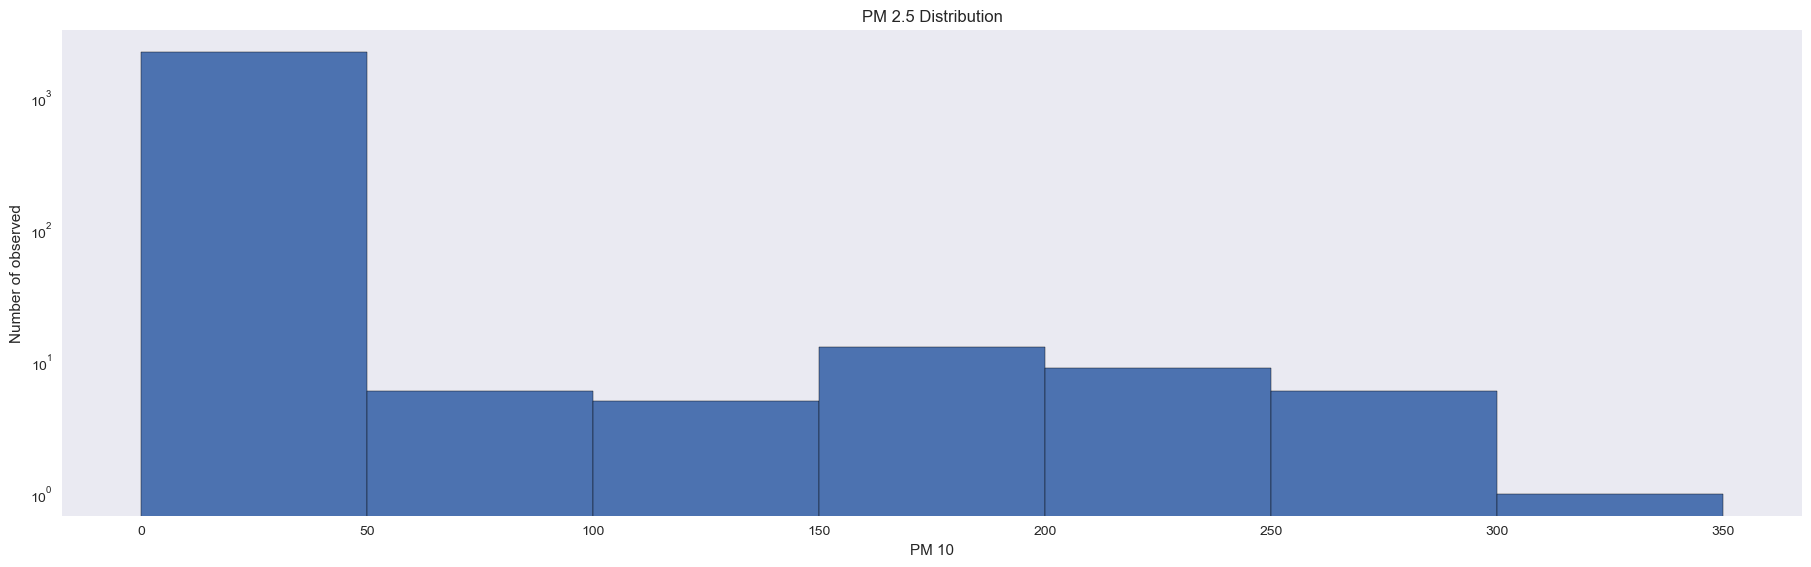

In [120]:
p2 = df['pm2.5']
plt.figure(figsize=(20, 6))
bins=[0,50,100,150,200,250,300,350]
plt.hist(p2,bins=bins,edgecolor ='black',log=True)
plt.title('PM 2.5 Distribution')
plt.xlabel('PM 10')
plt.ylabel('Number of observed')
plt.show()

**Insights**
- The majority of PM 2.5 concentrations are below 50.
- There are fewer observations for higher PM 2.5 concentrations (above 50).
- Overall, this histogram effectively shows that PM 2.5 concentrations are predominantly low, with rare occurrences of higher concentrations.

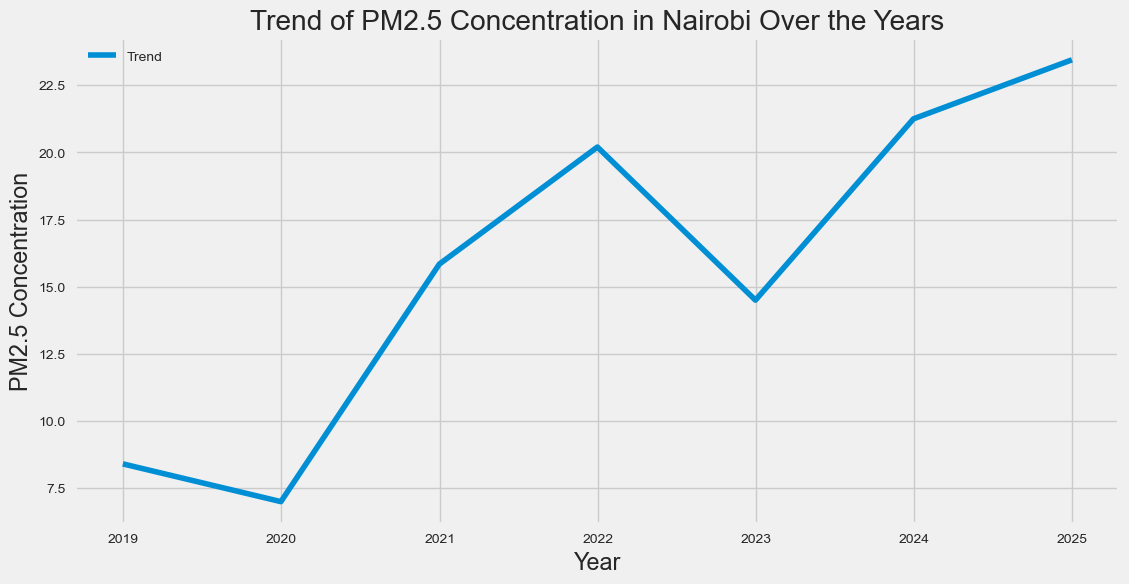

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('fivethirtyeight')

# Resample the data to yearly frequency
yearly_df = df['pm2.5'].resample('Y').median()

# Perform seasonal decomposition
result = seasonal_decompose(yearly_df, model='multiplicative')

# Plot the trend component
plt.figure(figsize=(12, 6))
plt.plot(result.trend, label='Trend')
plt.title('Trend of PM2.5 Concentration in Nairobi Over the Years')
plt.xlabel('Year')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.show()



**PM 10**

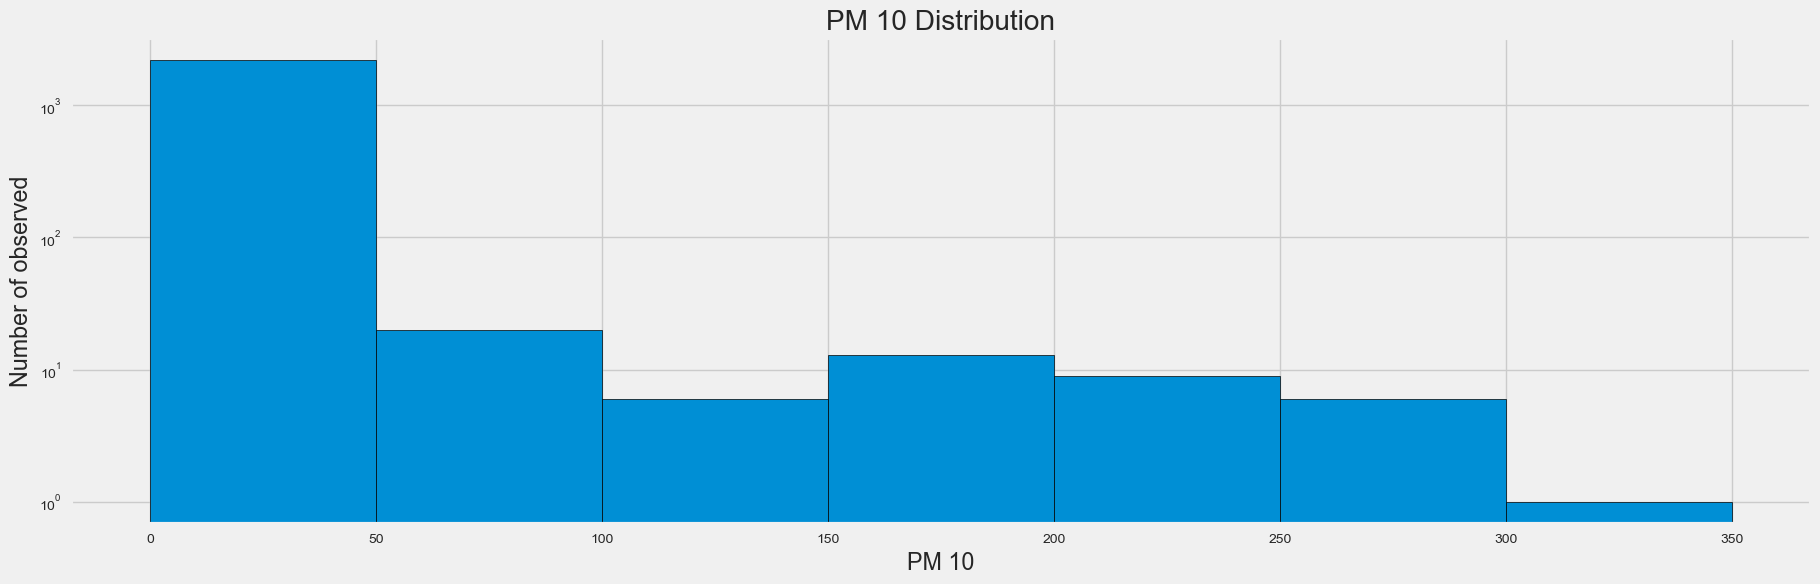

In [122]:
plt.style.use('fivethirtyeight')
p1 = df['pm10']
plt.figure(figsize=(20, 6))
bins=[0,50,100,150,200,250,300,350]
plt.hist(p1,bins=bins,edgecolor ='black',log=True)
plt.title('PM 10 Distribution')
plt.xlabel('PM 10')
plt.ylabel('Number of observed')
plt.show()

**Insight:**
- The majority of PM 10 concentrations fall within the range of 0 to 50.
- There are significantly fewer observations for higher concentrations (above 50).
- Logarithmic scale helps tovisualize the distribution more clearly, especially for ranges with a low number of observations.
- Overall, the histogram effectively shows that PM 10 concentrations are predominantly low, with a few occurrences of higher concentrations. 

**Humidity**

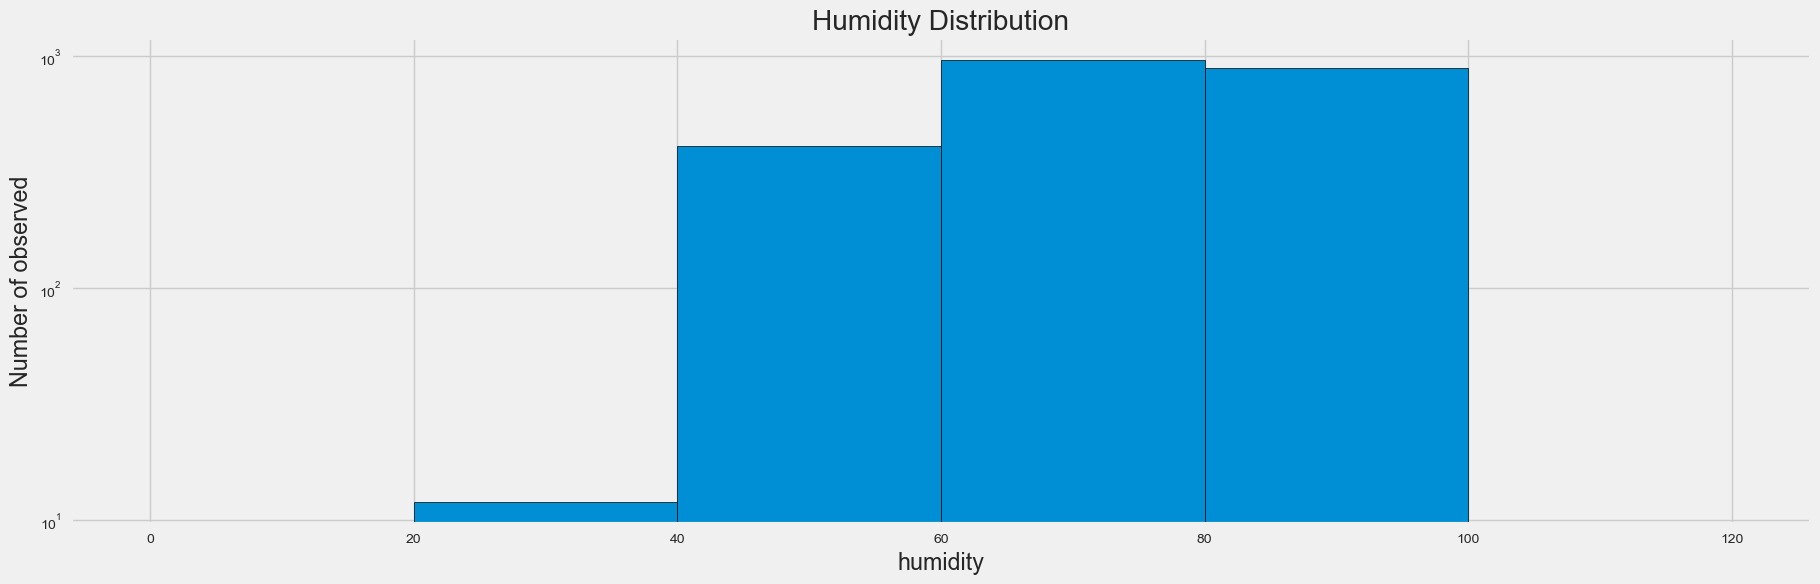

In [123]:
plt.style.use('fivethirtyeight')
humidity = df.humidity
plt.figure(figsize=(20, 6))
bins=[0,20,40,60,80,100,120]
plt.hist(humidity,bins=bins,edgecolor ='black',log=True)
plt.title('Humidity Distribution')
plt.xlabel('humidity')
plt.ylabel('Number of observed')
plt.show()

**Insights:**
- The majority of humidity measurements fell between 60 and 100.

**Precipitation**

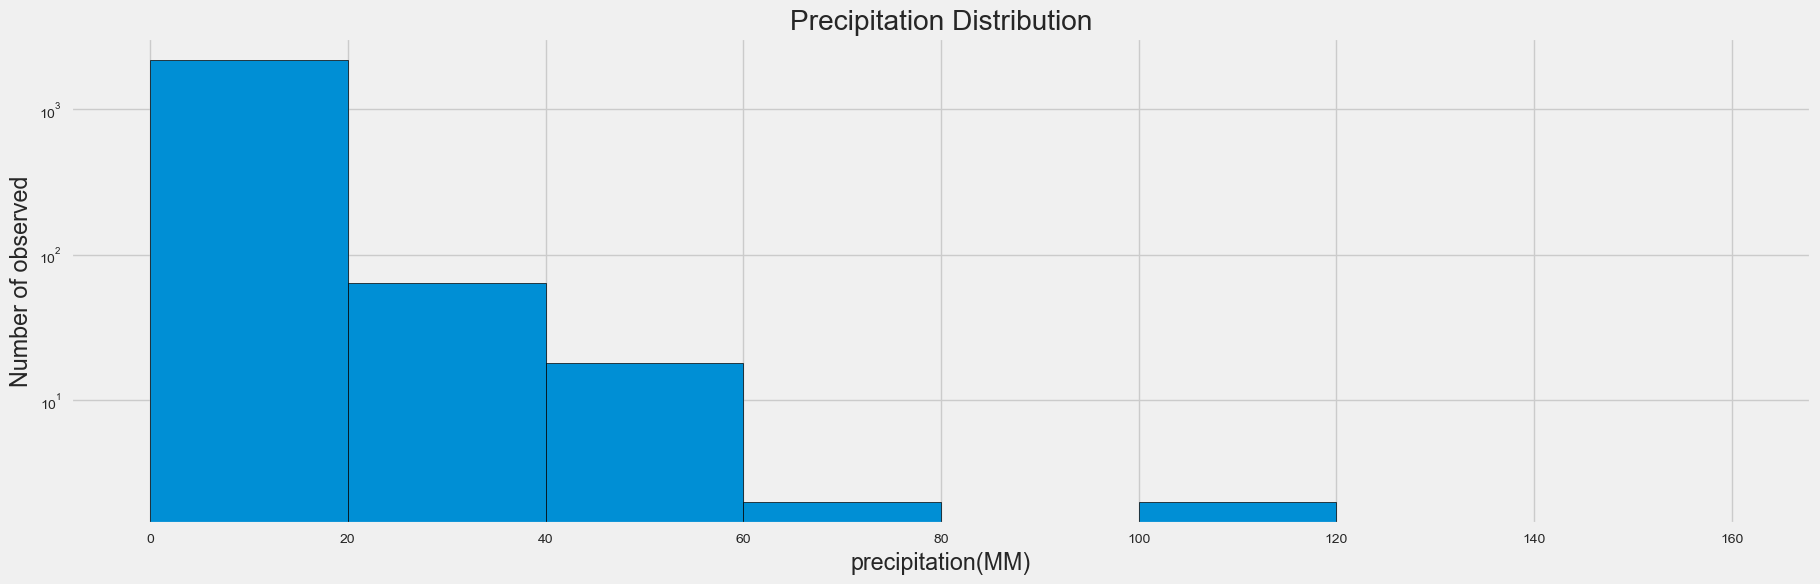

In [124]:
plt.style.use('fivethirtyeight')
precipitation = df.precipitation
plt.figure(figsize=(20, 6))
bins=[0,20,40,60,80,100,120,140,160]
plt.hist(precipitation,bins=bins,edgecolor ='black',log=True)
plt.title('Precipitation Distribution')
plt.xlabel('precipitation(MM)')
plt.ylabel('Number of observed')
plt.show()

**Insight**
- The majority of precipitation fell within the range of 0 to 20 mm

**Temperature**

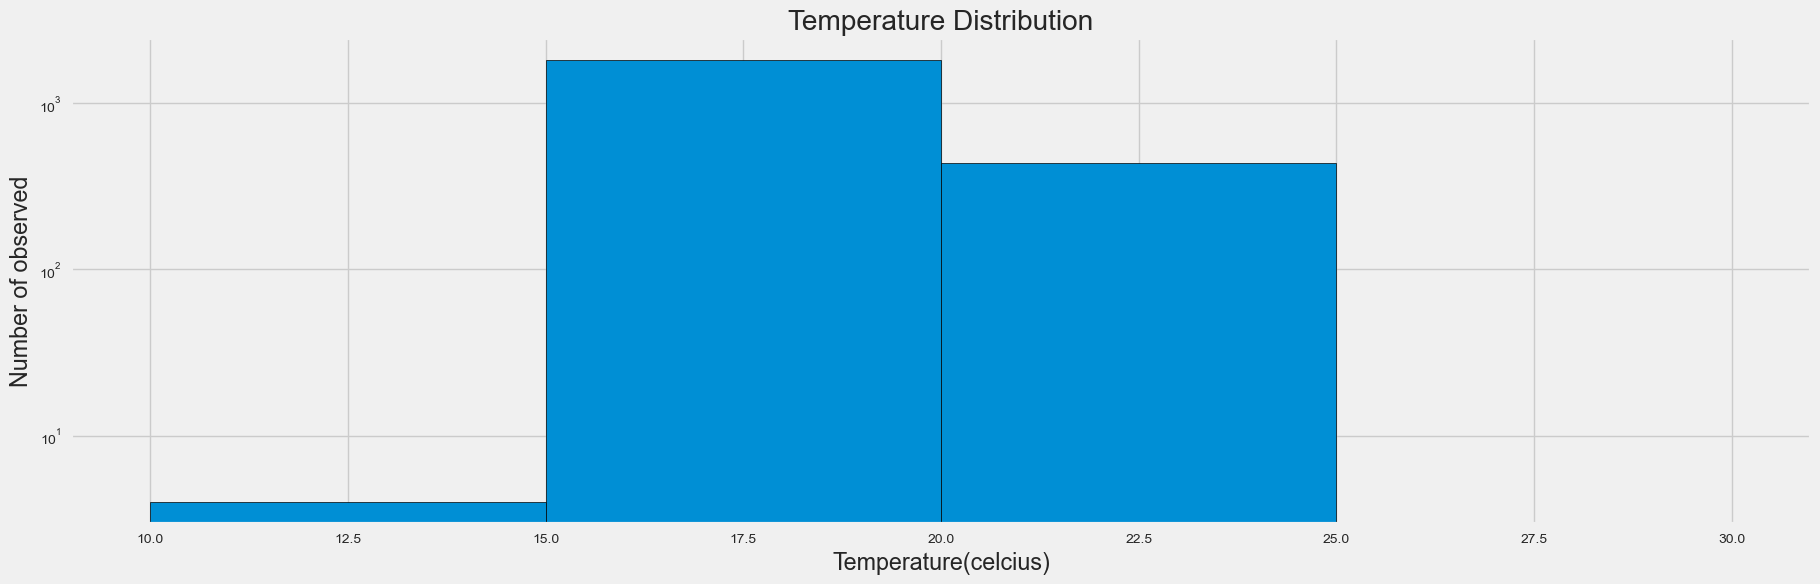

In [125]:
plt.style.use('fivethirtyeight')
temperature = df['temperature ']
plt.figure(figsize=(20, 6))
bins=[10,15,20,25,30]
plt.hist(temperature,bins=bins,edgecolor ='black',log=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature(celcius)')
plt.ylabel('Number of observed')
plt.show()

**Wind speed**

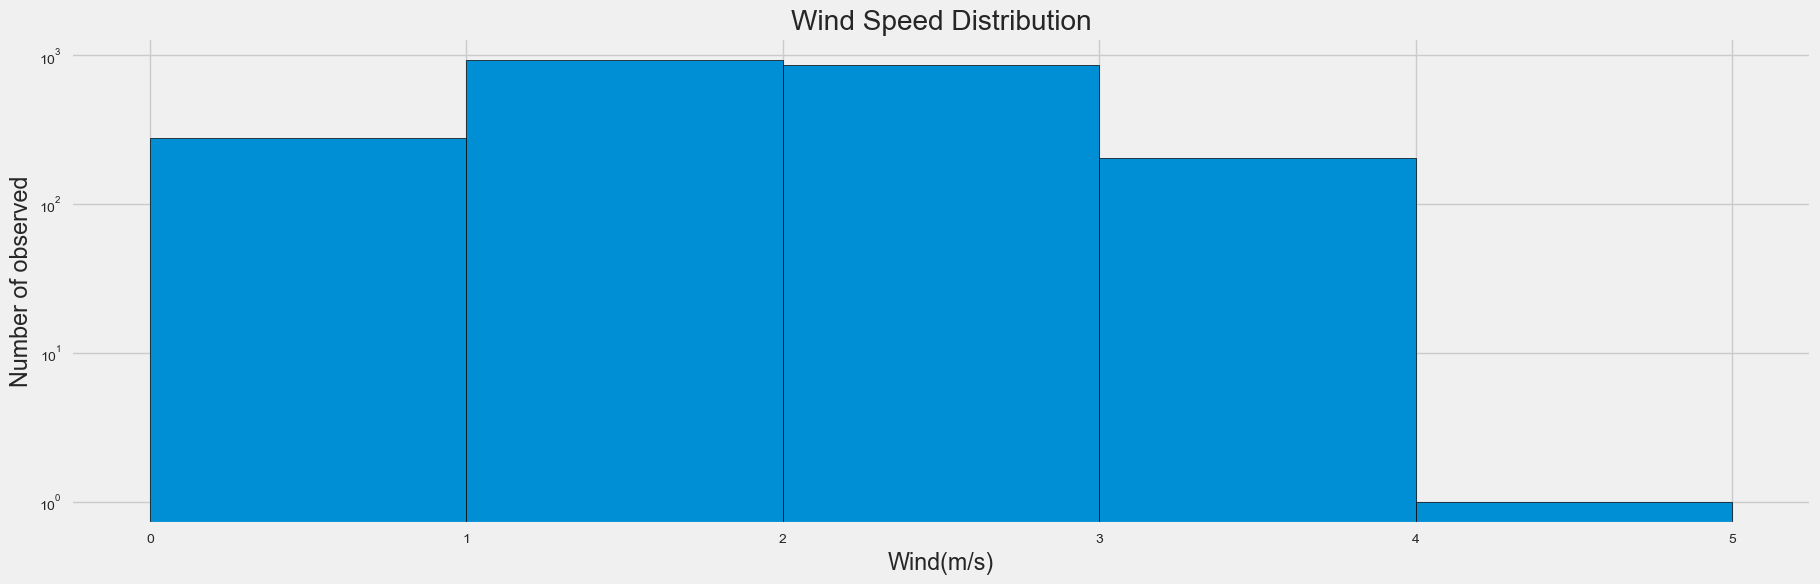

In [126]:
plt.style.use('fivethirtyeight')
wind = df['wind speed']
plt.figure(figsize=(20, 6))
bins=[0,1,2,3,4,5]
plt.hist(wind,bins=bins,edgecolor ='black',log=True)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind(m/s)')
plt.ylabel('Number of observed')
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

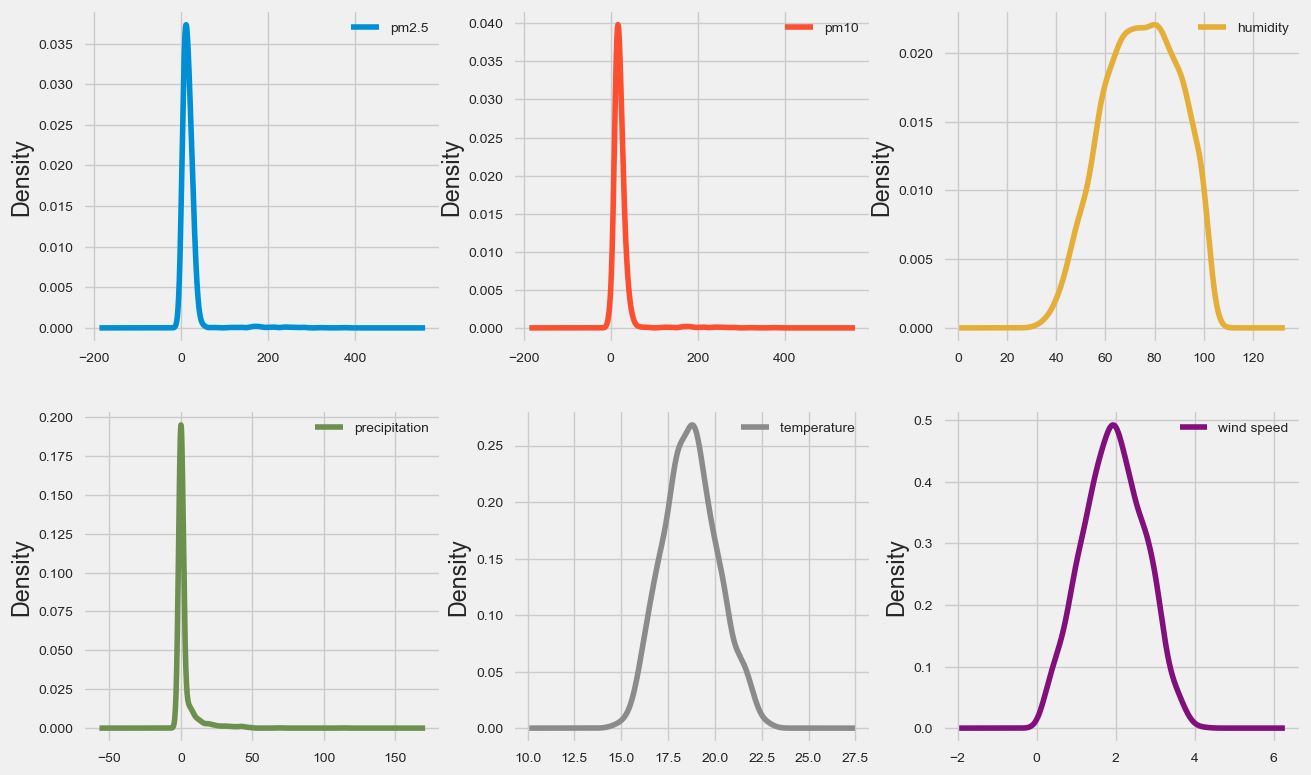

In [127]:
# Density Plots
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False,figsize = (14,14))

In [128]:
# checking for skewness
df.skew()

pm2.5            7.393939
pm10             7.166028
humidity        -0.170838
precipitation    5.619240
temperature      0.151291
wind speed      -0.003430
dtype: float64

pm2.5                Axes(0.08,0.641765;0.255882x0.238235)
pm10             Axes(0.387059,0.641765;0.255882x0.238235)
humidity         Axes(0.694118,0.641765;0.255882x0.238235)
precipitation        Axes(0.08,0.355882;0.255882x0.238235)
temperature      Axes(0.387059,0.355882;0.255882x0.238235)
wind speed       Axes(0.694118,0.355882;0.255882x0.238235)
dtype: object

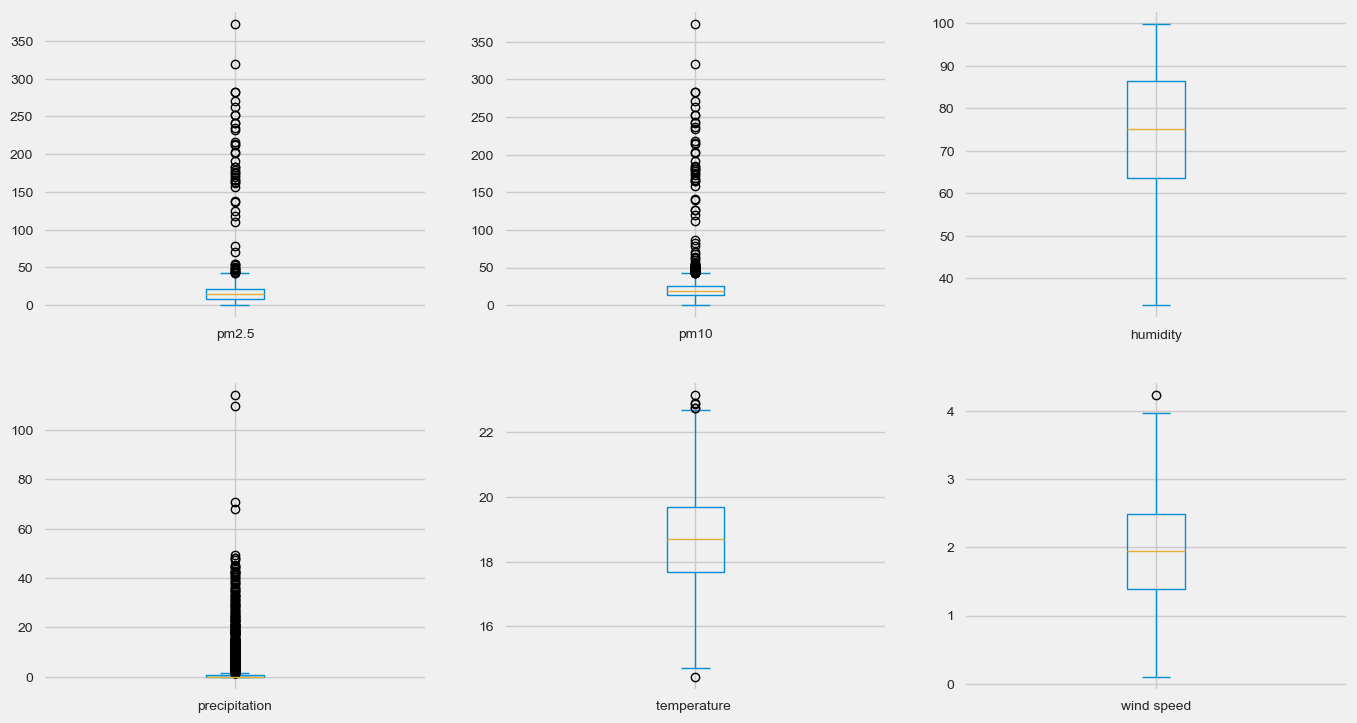

In [129]:
# Box and whisker plots
df.plot(kind='box', layout = (3,3),subplots=True, sharex=False, sharey=False,figsize = (15,13))

- Presence of outliers, in most of the variables

## Bivariate Analysis


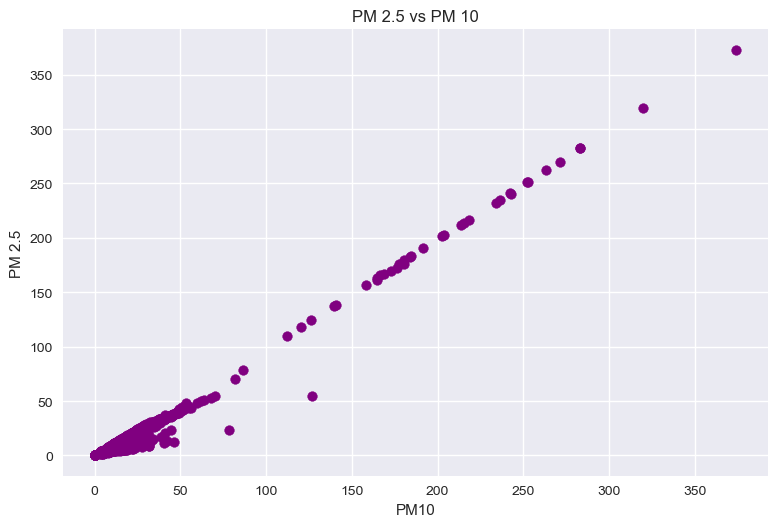

In [130]:
# PM2.5 vs PM10

plt.style.use('seaborn')
plt.scatter(p1,p2,c='purple')
plt.title('PM 2.5 vs PM 10')
plt.xlabel('PM10')
plt.ylabel('PM 2.5')
plt.tight_layout()
plt.show()


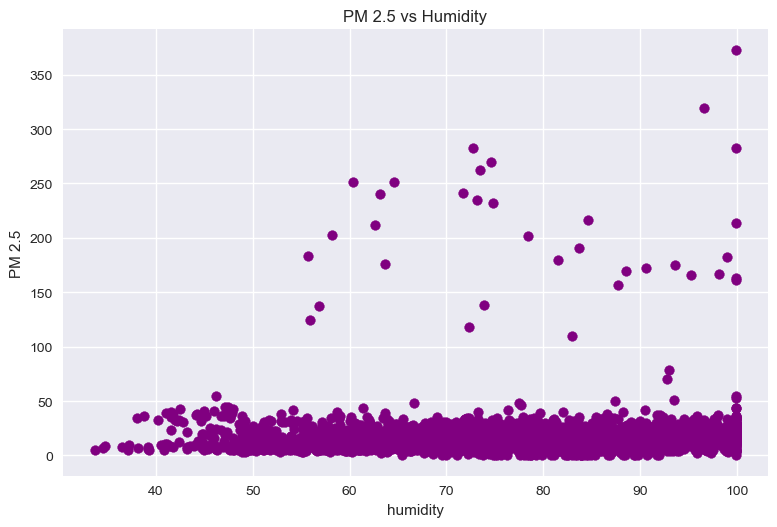

In [131]:
# PM2.5 vs Humidity

plt.style.use('seaborn')
plt.scatter(humidity,p2,c='purple')
plt.title('PM 2.5 vs Humidity')
plt.xlabel('humidity')
plt.ylabel('PM 2.5')
plt.tight_layout()
plt.show()

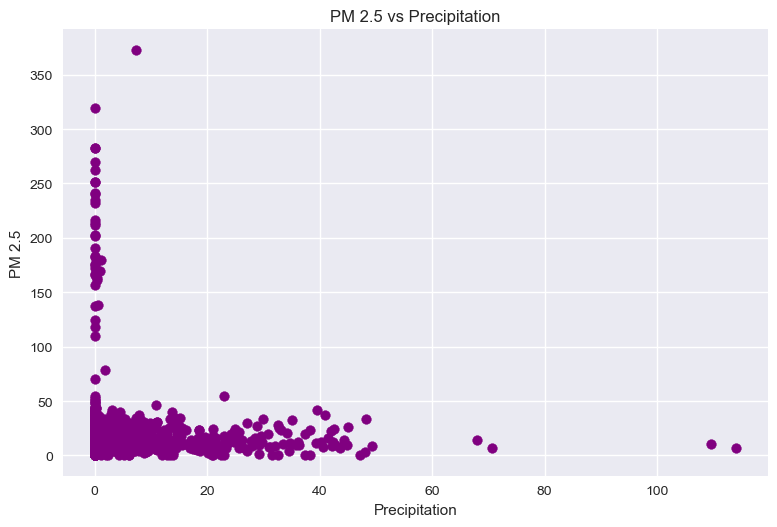

In [132]:
# PM2.5 vs Precipitation

plt.style.use('seaborn')
plt.scatter(precipitation,p2,c='purple')
plt.title('PM 2.5 vs Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('PM 2.5')
plt.tight_layout()
plt.show()

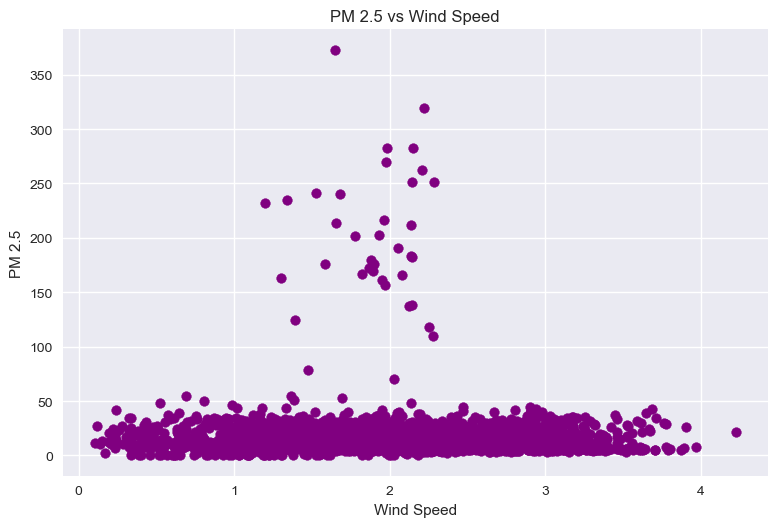

In [133]:
# PM2.5 vs Wind Speed

plt.style.use('seaborn')
plt.scatter(wind,p2,c='purple')
plt.title('PM 2.5 vs Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('PM 2.5')
plt.tight_layout()
plt.show()

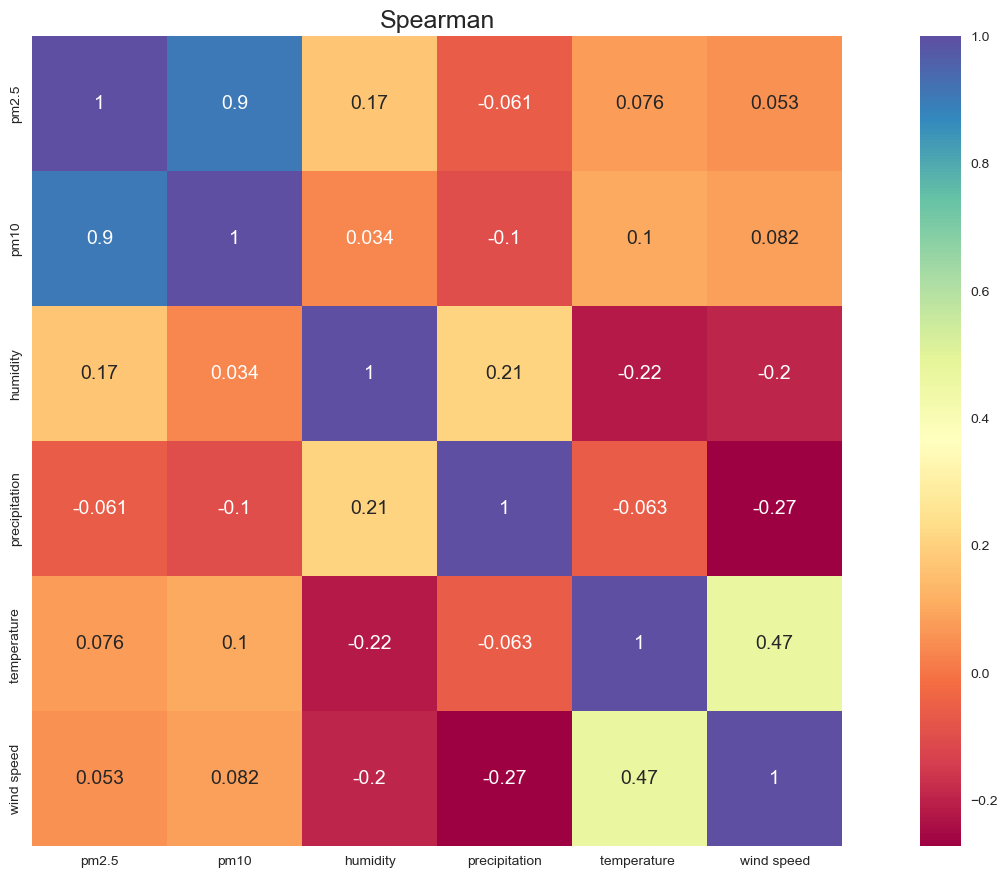

In [134]:
# Correlation matrix 
plt.figure(figsize=(18, 10))

# Calculate Spearman correlation matrix
correlation = df.corr(method='spearman')

# Define a colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a heatmap for the Spearman correlation
sns.heatmap(correlation, square=True, annot=True, cmap='Spectral')
plt.title('Spearman', fontsize=18)

plt.show()

**Insight**
- There appears to be negative correlation between precipation and pm2.5.
- The other variables have a positive correlation between pm2.5 and the other variables.

---
# Data Preprocessing
---

### Splitting the data into training and testing

In [135]:
# Defining my X and y
X = df.drop('pm2.5',axis = 1)
y = df['pm2.5']

### Feature Selection using Lasso Regression

In [136]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [137]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)
print('Coeffecients:',lasso.coef_)

# Get feature importance
feature_importance = np.abs(lasso.coef_)
selected_features = X.columns[feature_importance > 0]
selected_features

Coeffecients: [25.55660519  1.23045176  0.05036987  0.09868457 -0.        ]


Index(['pm10', 'humidity', 'precipitation', 'temperature '], dtype='object')

In [138]:
# Train a model with selected features
X_selected = X[['pm10', 'humidity', 'precipitation', 'temperature ']]

In [139]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

- We should ideally split the dataset into training and testing and then apply the outlier engineering techniques onto the training set, because we want to keep the test set untouched until the very end.

- We'll want see how such a model performs on unseen data which may or may not contain outliers

### Dealing with outliers

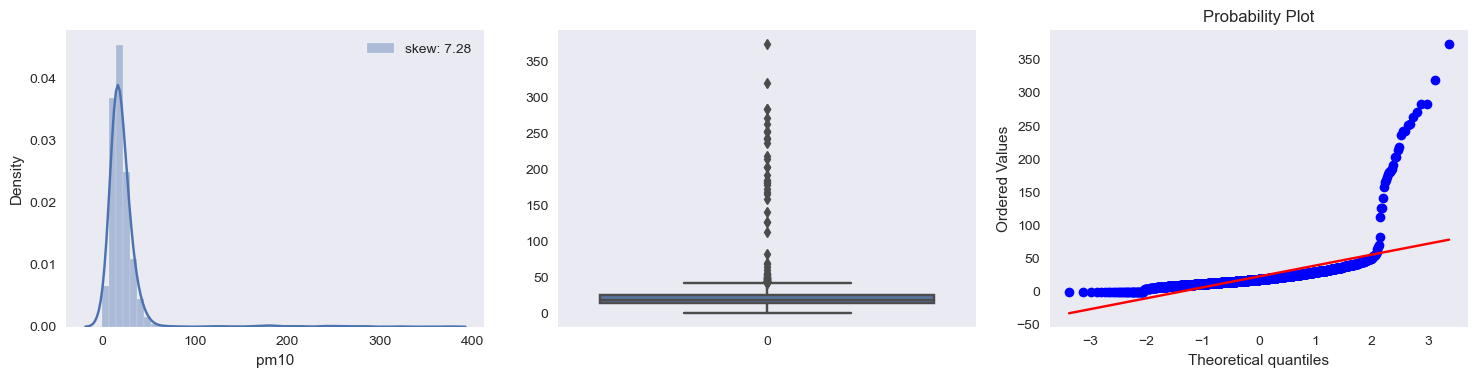

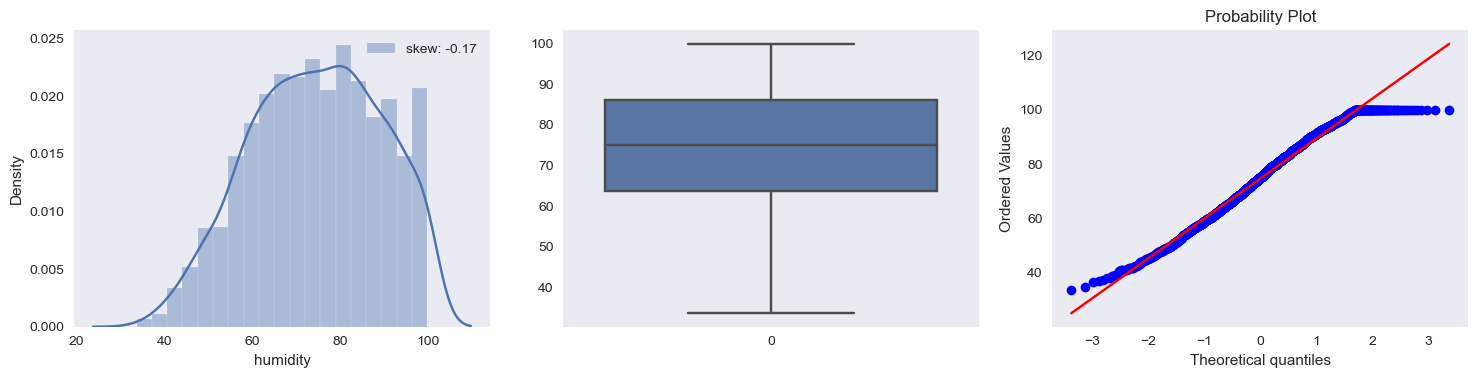

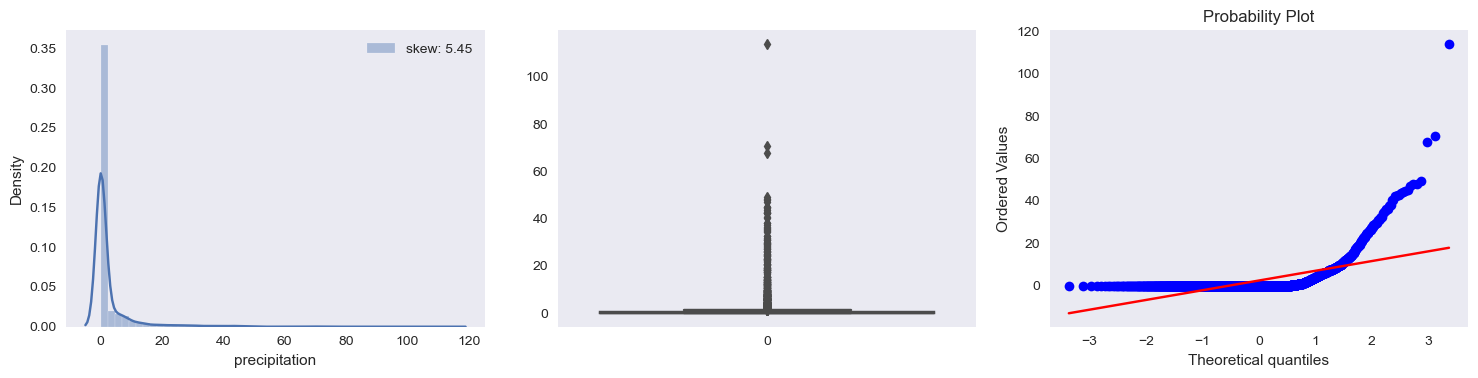

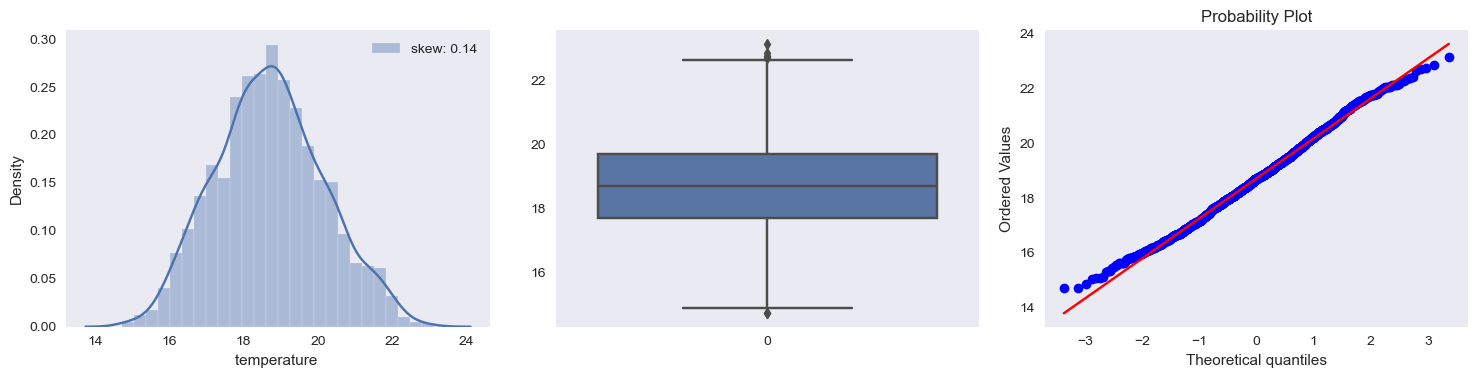

In [140]:
import scipy.stats as stats

sns.set_style('dark')
for col in X_train:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(X_train[col], label="skew: " + str(np.round(X_train[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(X_train[col])
    plt.subplot(133)
    stats.probplot(X_train[col], plot=plt)
    plt.tight_layout()
    plt.show()

- We have outliers present in all the variables apart from humidity.

#### Using floor and capping technique with IQR -(Handing the outliers)

In [141]:
def find_boundaries(df,variables):
    Q1 = df[variables].quantile(.25)
    Q3= df[variables].quantile(.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5*IQR
    upper_boundary = Q3 + 1.5*IQR

    return lower_boundary, upper_boundary


In [142]:
#PM10
lower_pm10, upper_pm10 = find_boundaries(X_train,'pm10')

X_train['pm10']= np.where(X_train['pm10'] > upper_pm10,upper_pm10,
                     np.where(X_train['pm10'] < lower_pm10,lower_pm10 ,X_train['pm10']))

In [143]:
#Precipitation
lower_precipitation, upper_precipitation = find_boundaries(X_train,'precipitation')

X_train['precipitation']= np.where(X_train['precipitation'] > upper_precipitation,upper_precipitation,
                     np.where(X_train['precipitation'] < lower_precipitation,lower_precipitation ,X_train['precipitation']))

In [144]:
#Temperature
lower_temperature, upper_temperature = find_boundaries(X_train,'temperature ')

X_train['temperature ']= np.where(X_train['temperature '] > upper_temperature,upper_temperature,
                     np.where(X_train['temperature '] < lower_temperature,lower_temperature ,X_train['temperature ']))

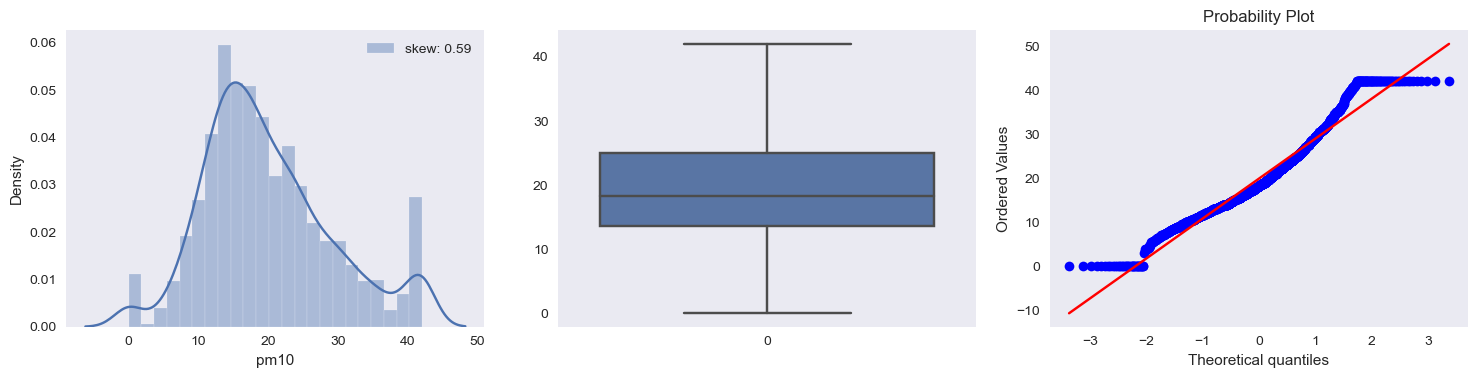

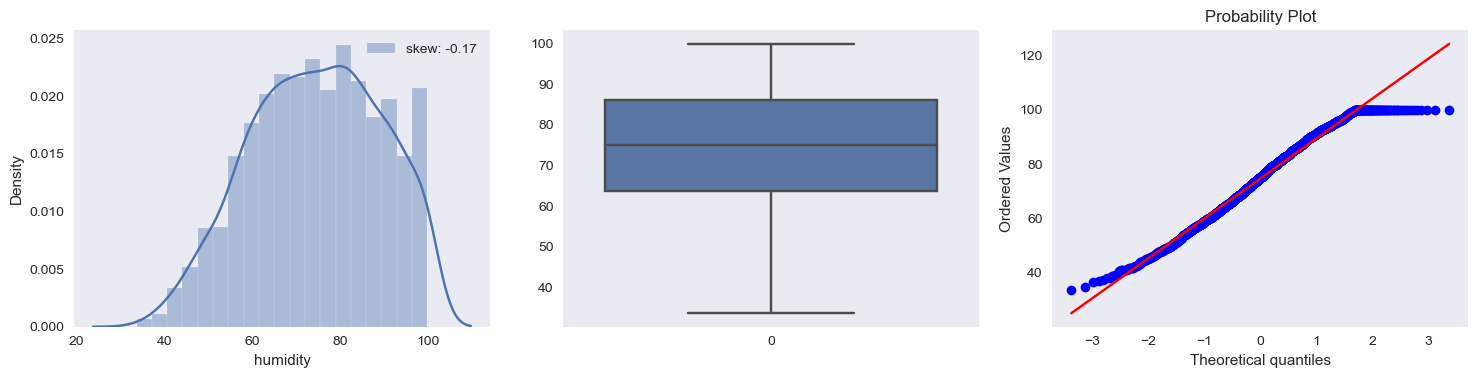

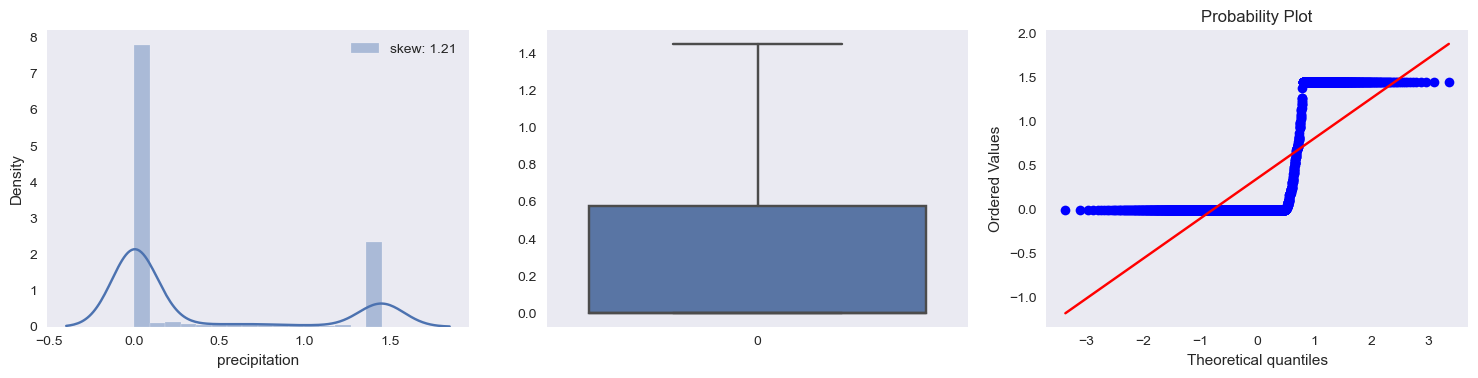

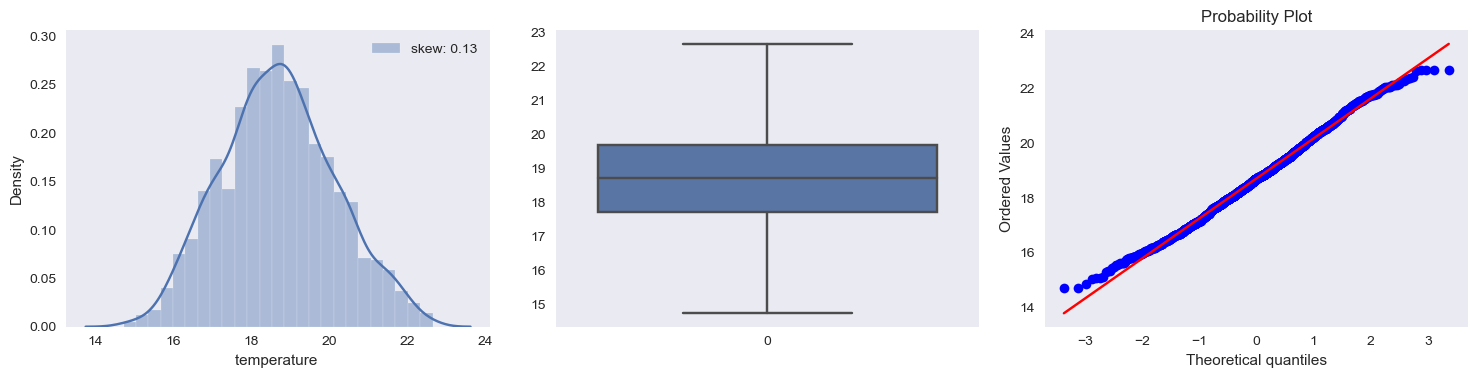

In [145]:
import scipy.stats as stats

sns.set_style('dark')
for col in X_train:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(X_train[col], label="skew: " + str(np.round(X_train[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(X_train[col])
    plt.subplot(133)
    stats.probplot(X_train[col], plot=plt)
    plt.tight_layout()
    plt.show()

**Obseravtion made:**

- No more outliers in the dataset

In [146]:
X_train

,pm10,humidity,precipitation,temperature
timestamp,,,,
2022-03-06,11.875000,57.600000,0.000000,20.7040
2023-10-07,15.900000,83.900000,0.000000,20.1873
2019-03-27,13.025000,57.600000,0.000000,21.2058
2018-11-13,14.170000,71.450000,1.451875,18.9115
2022-08-11,11.666667,80.833333,0.000000,16.1819
...,...,...,...,...
2022-06-27,10.800000,64.600000,0.000000,17.1180
2020-12-31,9.000000,95.100000,1.451875,17.2531
2021-02-04,40.625000,60.183333,0.000000,20.7067


**Performing Feature selection after dealing with outliers**

In [147]:
import numpy as np
from sklearn import linear_model
import pandas as pd

# Fitting the lasso regression model
lasso_reg = linear_model.Lasso(alpha=10)  # alpha = 0 -> linear regression
lasso_reg.fit(X_train, y_train)

# Print coefficients
print('Coefficients:', lasso_reg.coef_)

# Get feature importance
feature_importance = np.abs(lasso_reg.coef_)
selected_features = X_train.columns[feature_importance > 0]

print('Selected Features:', selected_features)


Coefficients: [ 1.51338271  0.08998413 -0.          0.        ]
Selected Features: Index(['pm10', 'humidity'], dtype='object')


In [148]:
# Dropping the columns that wer found to be irrelevant
X_train = X_train.drop(['precipitation','temperature '],axis=1)
X_test = X_test.drop(['precipitation','temperature '],axis=1)


---
# Model Building
---

**Multiple Linear Regression**

In [149]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
linear_reg = linear_model.LinearRegression()

#training of the model
linear_reg.fit(X_train,y_train) 

# Coeffecients
print('Coeffecients:',linear_reg.coef_)

Coeffecients: [1.62972162 0.13533268]


In [150]:
# Predicting on the test set
y_pred = linear_reg.predict(X_test)

print("Mean absolute error(test): %.2f" % np.mean(np.absolute(y_pred - y_test)))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print("Root Mean Squared Error (test): %.2f" % rmse)

# R-squared (Coefficient of Determination)
r_squared = linear_reg.score(X_test, y_test)
print(f"R-squared (test): {r_squared:.2f}")

# Evaluate variance
variance = np.var(y_pred)   
print(f"Variance: {variance}")


# Evaluate SSE
SSE = np.mean((np.mean(y_pred)- y)**2)

# Evaluate Variance
Bias = SSE - variance
print(f"Bias: {Bias}")


Mean absolute error(test): 7.85
Root Mean Squared Error (test): 15.82
R-squared (test): 0.48
Variance: 1317.8814991044005
Bias: -624.2920221950143


**Ridge regression**

In [151]:
# Performing Grid search cv to identify the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [152]:
#Performing hyperparameter Tuning to get the best alpha
model = Ridge()
param_grid = {
    'alpha': [0.1,0.01,0.2,0.5,1,10, 100,200,250]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 250}


In [153]:
# Fitting the ridge regression model
ridge_reg = Ridge(alpha=250)  # alpha = 0 -> linear regression
ridge_reg.fit(X_train, y_train)


Ridge(alpha=250)

In [154]:
# Predicting on the test set
y_pred = ridge_reg.predict(X_test)
print('Coeffecients:',ridge_reg.coef_)

print("Mean absolute error(test): %.2f" % np.mean(np.absolute(y_pred - y_test)))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print("Root Mean Squared Error (test): %.2f" % rmse)

# R-squared (Coefficient of Determination)
r_squared = ridge_reg.score(X_test, y_test)
print(f"R-squared (test): {r_squared:.2f}")


# Evaluate variance
variance = np.var(y_pred)   # O/P : 56.5508555156
print(f"Variance: {variance}")


# Evaluate SSE
SSE = np.mean((np.mean(y_pred)- y)**2)

# Evaluate Variance
Bias = SSE - variance
print(f"Bias: {Bias}")

Coeffecients: [1.62711352 0.13525038]
Mean absolute error(test): 7.82
Root Mean Squared Error (test): 15.77
R-squared (test): 0.49
Variance: 1313.688097453402
Bias: -620.1524857758495


**Lasso Regression**

In [155]:
from sklearn.linear_model import Lasso

In [156]:
# Define the model
model = Lasso()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1,0.01,0.2,0.5,1,10, 100,200,250]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 10}


In [157]:
# Fitting the lasso regression model
lasso_reg = linear_model.Lasso(alpha=10)  # alpha = 0 -> linear regression
lasso_reg.fit(X_train, y_train)

Lasso(alpha=10)

In [158]:
# Predicting on the test set
y_pred = lasso_reg.predict(X_test)
print('Coeffecients:',lasso_reg.coef_)

print("Mean absolute error(test): %.2f" % np.mean(np.absolute(y_pred - y_test)))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print("Root Mean Squared Error (test): %.2f" % rmse)

# R-squared (Coefficient of Determination)
r_squared = lasso_reg.score(X_test, y_test)
print(f"R-squared (test): {r_squared:.2f}")


# Evaluate variance
variance = np.var(y_pred)   # O/P : 56.5508555156
print(f"Variance: {variance}")


# Evaluate SSE
SSE = np.mean((np.mean(y_pred)- y)**2)

# Evaluate Variance
Bias = SSE - variance
print(f"Bias: {Bias}")


Coeffecients: [1.51338271 0.08998413]
Mean absolute error(test): 6.86
Root Mean Squared Error (test): 13.32
R-squared (test): 0.63
Variance: 1131.4686674688433
Bias: -440.1391285010794


**Decision Tree**

In [159]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['mse', 'friedman_mse', 'mae']  # Different criteria for splitting nodes
}

# Initialize DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=10, 
                           scoring='neg_root_mean_squared_error', 
                           n_jobs=-1,  # Use all available CPUs
                           verbose=2)  # Print progress

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters:", grid_search.best_params_)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [160]:
from sklearn.tree import DecisionTreeRegressor

# For regression
dt_regressor = DecisionTreeRegressor(random_state=42,criterion='friedman_mse',max_depth=10, min_samples_leaf= 4, min_samples_split= 10)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [161]:
# Predicting on the test set
y_pred = dt_regressor.predict(X_test)

print("Mean absolute error(test): %.2f" % np.mean(np.absolute(y_pred - y_test)))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print("Root Mean Squared Error (test): %.2f" % rmse)

# R-squared (Coefficient of Determination)
r_squared = dt_regressor.score(X_test, y_test)
print(f"R-squared (test): {r_squared:.2f}")


# Evaluate variance
variance = np.var(y_pred)   # O/P : 56.5508555156
print(f"Variance: {variance}")


# Evaluate SSE
SSE = np.mean((np.mean(y_pred)- y)**2)

# Evaluate Variance
Bias = SSE - variance
print(f"Bias: {Bias}")

Mean absolute error(test): 4.03
Root Mean Squared Error (test): 12.40
R-squared (test): 0.68
Variance: 514.1903346350674
Bias: 162.19803726941666


 ### Performing cross validation - To improve Performance

In [162]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

In [163]:
# Define a function to calculate bias and variance
def calculate_bias_variance(model, X, y, cv):
    biases = []
    variances = []
    for train_index, test_index in cv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        bias = np.mean((y_test - np.mean(y_pred))**2)
        variance = np.mean((y_pred - np.mean(y_pred))**2)
        
        biases.append(bias)
        variances.append(variance)
    
    return np.mean(biases), np.mean(variances)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor()
}

# Define cross-validation method
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate models
for name, model in models.items():
    mae_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    rmse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

    bias, variance = calculate_bias_variance(model, X.values, y.values, cv)
    
    print(f'{name} - Mean Absolute Error: {-np.mean(mae_scores):.2f}')
    print(f'{name} - Root Mean Squared Error: {-np.mean(rmse_scores):.2f}')
    print(f'{name} - R-squared: {np.mean(r2_scores):.2f}')
    print(f'{name} - Bias: {bias:.2f}')
    print(f'{name} - Variance: {variance:.2f}')
    print('-----')

Linear Regression - Mean Absolute Error: 2.54
Linear Regression - Root Mean Squared Error: 3.60
Linear Regression - R-squared: 0.96
Linear Regression - Bias: 671.72
Linear Regression - Variance: 656.21
-----


Ridge Regression - Mean Absolute Error: 2.54
Ridge Regression - Root Mean Squared Error: 3.60
Ridge Regression - R-squared: 0.96
Ridge Regression - Bias: 671.72
Ridge Regression - Variance: 656.21
-----
Lasso Regression - Mean Absolute Error: 2.55
Lasso Regression - Root Mean Squared Error: 3.60
Lasso Regression - R-squared: 0.96
Lasso Regression - Bias: 671.73
Lasso Regression - Variance: 653.87
-----
Decision Tree Regression - Mean Absolute Error: 2.40
Decision Tree Regression - Root Mean Squared Error: 4.57
Decision Tree Regression - R-squared: 0.94
Decision Tree Regression - Bias: 671.74
Decision Tree Regression - Variance: 639.58
-----


---
# Model Comparison
---

In [164]:
# Define the results data
import pandas as pd

# Define the results data
data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree Regression'],

    # Before CV results
    'MAE Before CV': [7.85, 7.82, 6.86, 4.03],  
    'RMSE Before CV': [15.82,  15.77, 13.32,  12.40], 
    'R-squared Before CV': [0.48,  0.49, 0.63,  0.68],  
    'Bias Before CV': [-624.2920221950143, -620.1524857758495, -440.1391285010794,  162.19803726941666],  
    'Variance Before CV': [1317.8814991044005, 1313.688097453402, 1131.4686674688433,514.1903346350674],  
    # After CV results
    'MAE After CV': [2.54, 2.54, 2.55, 2.39],  
    'RMSE After CV': [3.60, 3.60, 3.60, 4.74],  
    'R-squared After CV': [0.96, 0.96, 0.96, 0.94],  
    'Bias After CV': [671.72, 671.72, 671.73, 671.81],  
    'Variance After CV': [656.21, 656.21, 653.87, 631.86] 
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Display DataFrame
results_df


# Create DataFrame
results_df = pd.DataFrame(data)

# Display DataFrame
results_df

,Model,MAE Before CV,RMSE Before CV,R-squared Before CV,Bias Before CV,Variance Before CV,MAE After CV,RMSE After CV,R-squared After CV,Bias After CV,Variance After CV
0,Linear Regression,7.85,15.82,0.48,-624.292022,1317.881499,2.54,3.60,0.96,671.72,656.21
1,Ridge Regression,7.82,15.77,0.49,-620.152486,1313.688097,2.54,3.60,0.96,671.72,656.21
2,Lasso Regression,6.86,13.32,0.63,-440.139129,1131.468667,2.55,3.60,0.96,671.73,653.87
3,Decision Tree Regression,4.03,12.40,0.68,162.198037,514.190335,2.39,4.74,0.94,671.81,631.86


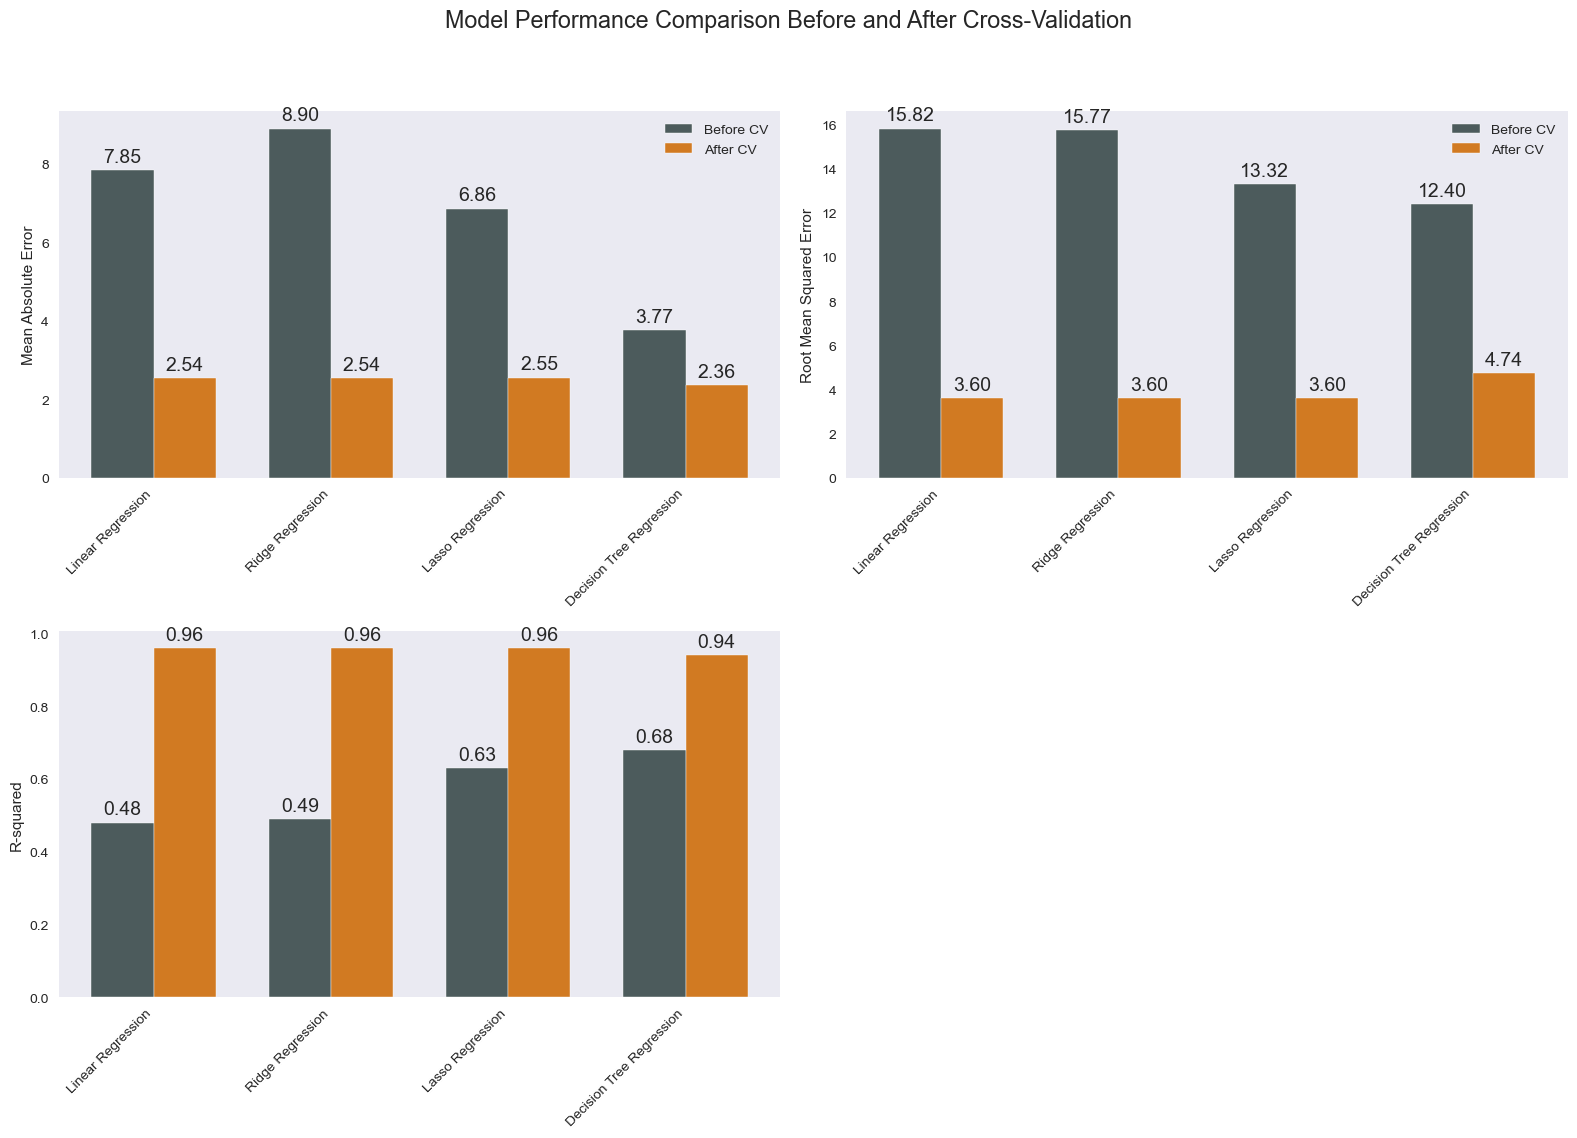

In [165]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree Regression']

# Metrics before CV
mae_before = [7.85, 8.90, 6.86, 3.77]
rmse_before = [15.82, 15.77, 13.32, 12.40]
r2_before = [0.48, 0.49, 0.63, 0.68]

# Metrics after CV
mae_after = [2.54, 2.54, 2.55, 2.36]
rmse_after = [3.60, 3.60, 3.60, 4.74]
r2_after = [0.96, 0.96, 0.96, 0.94]

# Define positions for bar groups
x = np.arange(len(models))
width = 0.35  # Width of the bars

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison Before and After Cross-Validation')

# Function to add labels
def add_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# MAE
bars1 = axs[0, 0].bar(x - width/2, mae_before, width, label='Before CV', color='#4C5B5C')
bars2 = axs[0, 0].bar(x + width/2, mae_after, width, label='After CV', color='#D17A22')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(models, rotation=45, ha='right')
axs[0, 0].set_ylabel('Mean Absolute Error')
axs[0, 0].legend()
add_labels(axs[0, 0], bars1)
add_labels(axs[0, 0], bars2)

# RMSE
bars1 = axs[0, 1].bar(x - width/2, rmse_before, width, label='Before CV', color='#4C5B5C')
bars2 = axs[0, 1].bar(x + width/2, rmse_after, width, label='After CV', color='#D17A22')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(models, rotation=45, ha='right')
axs[0, 1].set_ylabel('Root Mean Squared Error')
axs[0, 1].legend()
add_labels(axs[0, 1], bars1)
add_labels(axs[0, 1], bars2)

# R-squared
bars1 = axs[1, 0].bar(x - width/2, r2_before, width, label='Before CV', color='#4C5B5C')
bars2 = axs[1, 0].bar(x + width/2, r2_after, width, label='After CV', color='#D17A22')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(models, rotation=45, ha='right')
axs[1, 0].set_ylabel('R-squared')
add_labels(axs[1, 0], bars1)
add_labels(axs[1, 0], bars2)

# Remove the empty plot and adjust layout
axs[1, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Observations made:**


- All models show improved performance after CV. MAE and RMSE are significantly lower, and R-squared values are much higher, indicating better predictive accuracy.

- Using the RMSE metric, Linear Regression, Ridge Regression and Simple Linear regression(3.60), were found to be the best after performing cross validation.

- In terms of explaining the variability in the dataset, Decision Tree had the highest R-squared.

---
# Model Complexity
---

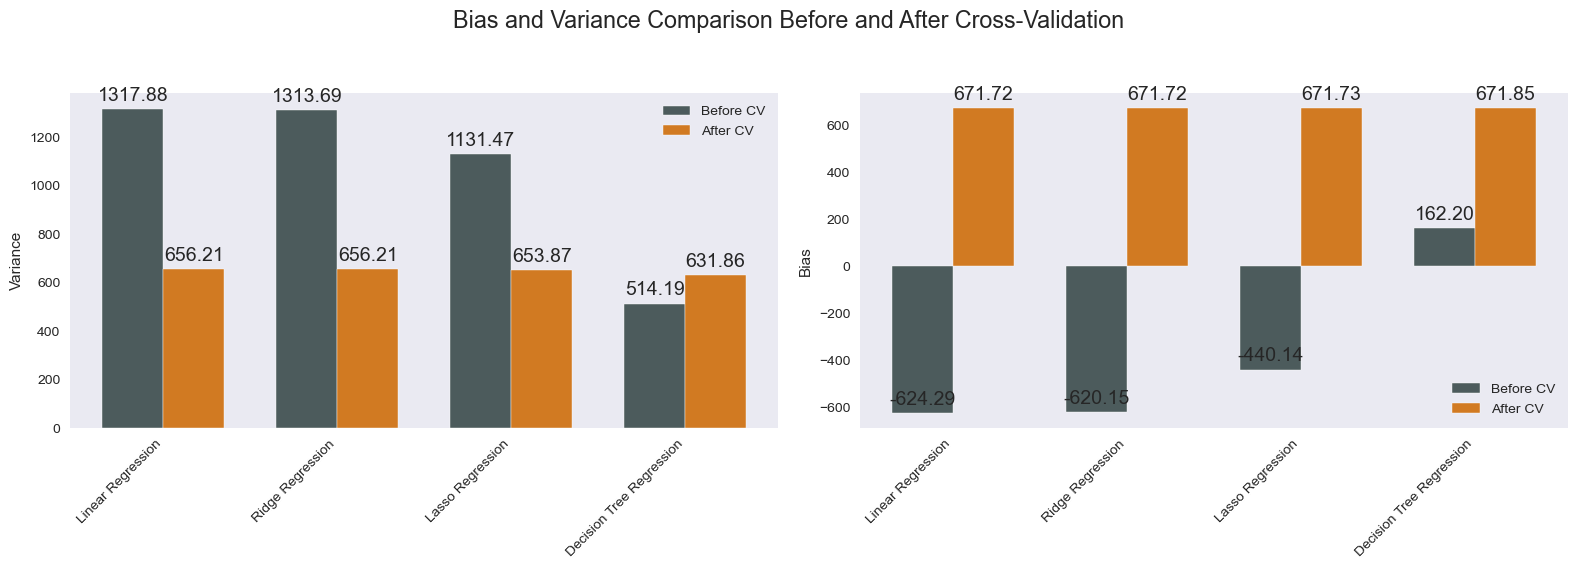

In [166]:
# Defining the models
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree Regression']

# Metrics before CV
variance_before = [1317.88, 1313.69, 1131.47,514.19]
bias_before = [-624.29, -620.15, -440.14,  162.20]

# Metrics after CV
variance_after = [656.21, 656.21, 653.87, 631.86]
bias_after = [671.72, 671.72, 671.73, 671.85]

# Define positions for bar groups
x = np.arange(len(models))
width = 0.35  # Width of the bars

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Bias and Variance Comparison Before and After Cross-Validation')

# Variance
bars1 = axs[0].bar(x - width/2, variance_before, width, label='Before CV', color='#4C5B5C')
bars2 = axs[0].bar(x + width/2, variance_after, width, label='After CV', color='#D17A22')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models, rotation=45, ha='right')
axs[0].set_ylabel('Variance')
axs[0].legend()
def add_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
add_labels(axs[0], bars1)
add_labels(axs[0], bars2)

# Bias
bars1 = axs[1].bar(x - width/2, bias_before, width, label='Before CV', color='#4C5B5C')
bars2 = axs[1].bar(x + width/2, bias_after, width, label='After CV', color='#D17A22')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models, rotation=45, ha='right')
axs[1].set_ylabel('Bias')
axs[1].legend()
add_labels(axs[1], bars1)
add_labels(axs[1], bars2)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


- Low bias,low variance (Best model)
- low bias,high variance -> Overfitting
- High bias,Low variance -> Underfitting

**Conclusion**
----
Model Performance after Cross-Validation:

- All models showed improved performance after cross-validation. The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) were significantly lower, and R-squared values were much higher, indicating better predictive accuracy.

Bias-Variance Trade-off:

- Decision Tree Model exhibited the lowest variance and highest bias, leading to underfitting. Despite having the highest R-squared value, which indicates it explains the variability in the dataset well, the high bias suggests it may not capture the true underlying patterns effectively.

- Multiple Linear Regression and Ridge Regression Models demonstrated high variance and low bias, indicative of overfitting. They performed well in terms of RMSE after cross-validation, suggesting that while they may fit the training data closely, they might not generalize as well to unseen data.

- Lasso Regression Model had low variance and the second lowest bias, making it potentially the best model. Its performance was robust, balancing the trade-off between bias and variance effectively.

Best Models Based on RMSE:

- Using the RMSE metric after cross-validation, Multiple Linear Regression, Ridge Regression, and Simple Linear Regression were identified as the best models, each achieving an RMSE of 3.60. This indicates their strong predictive accuracy post cross-validation.

Variability Explanation:

- The Decision Tree model had the highest R-squared value, showing it explains the most variability in the dataset, despite its underfitting tendencies.


**Overall Best model:**
---

Lasso Regression emerges as the best overall model. It achieves a good balance between bias and variance, leading to strong generalization to new data.

**Answers to my research questions:**
---

**1. How accurately can linear models predict PM2.5 concentrations in Nairobi?**

- All three linear models (Linear Regression, Ridge Regression, and Lasso Regression) were found to have low RMSE values, indicating high predictive accuracy.

**2. How does the performance of different linear models compare in predicting PM2.5 concentrations?**

- Lasso Regression emerged as the best model due to its balance between bias and variance. The Decision Tree model was found to underfit the data, while Multiple Linear Regression and Ridge Regression were found to overfit. This observation should be investigated further by adding more data to confirm the findings.

**3.  Can optimizing the parameters of linear models significantly improve their predictive accuracy?**

- Lasso Regression emerged as the best model due to its balance between bias and variance. The Decision Tree model was found to underfit the data, while Multiple Linear Regression and Ridge Regression were found to overfit. This observation should be investigated further by adding more data to confirm the findings.

**4. What has been the progression/ trend of PM 2.5 concentration over the years?**

- There was a noticeable drop in PM2.5 concentration in 2020. However, since then, there has been an increasing trend in PM2.5 concentrations.
